In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

2024-07-21 17:26:45.318530: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-21 17:26:45.348391: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-21 17:26:45.794409: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Coletando dados

df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/RJ_Reconstrucao_Crustaceos_2024_06_25.xlsx')

df_Camaroes = df[['Ano','Cam_sete_barbas_ind', 'Cam_branco_ind', 'Cam_rosa_ind', 'Cam_barba_ruca_ind','Cam_santana_ind','Cam_crista_ind']].dropna().reset_index(drop=True)


dados = df_Camaroes[['Ano','Cam_sete_barbas_ind']]
for i in range(len(dados['Ano'])):
  dados.loc[i,'Soma'] = df_Camaroes.loc[i,'Cam_sete_barbas_ind']+df_Camaroes.loc[i,'Cam_branco_ind']+df_Camaroes.loc[i,'Cam_rosa_ind']+df_Camaroes.loc[i, 'Cam_barba_ruca_ind']+df_Camaroes.loc[i, 'Cam_santana_ind']+df_Camaroes.loc[i, 'Cam_crista_ind']
  
dados = dados[['Ano','Cam_sete_barbas_ind','Soma']]

#Fazendo as proporções
for i in range(len(dados['Ano'])):
  dados.loc[i,'Prop_Cam_sete_barbas_ind'] = dados.loc[i,'Cam_sete_barbas_ind'] / dados.loc[i,'Soma']


anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()

prop = dados['Prop_Cam_sete_barbas_ind'].values
dados.head()

/tmp/ipykernel_47697/3612091187.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados.loc[i,'Soma'] = df_Camaroes.loc[i,'Cam_sete_barbas_ind']+df_Camaroes.loc[i,'Cam_branco_ind']+df_Camaroes.loc[i,'Cam_rosa_ind']+df_Camaroes.loc[i, 'Cam_barba_ruca_ind']+df_Camaroes.loc[i, 'Cam_santana_ind']+df_Camaroes.loc[i, 'Cam_crista_ind']


,Ano,Cam_sete_barbas_ind,Soma,Prop_Cam_sete_barbas_ind
0,2015,3.1240,113.41400,0.027545
1,2017,155.5610,511.54317,0.304101
2,2018,149.2569,594.49740,0.251064
3,2019,561.7829,883.27950,0.636019
4,2020,239.3203,377.16830,0.634519


In [3]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

prop_mean = np.mean(prop)
prop_std = np.std(prop)
prop_norm = (prop - prop_mean)/prop_std

In [11]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,prop_norm, epochs=100, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_sete_barbas/pesos prop ind 2010-2022/.weights.h5', overwrite=True)

Epoch 1/100


/home/andre/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 979ms/step - loss: 0.9882
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.9286
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.8784
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.8270
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7713
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.7089
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6390
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.5617
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.4833
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.4096
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3455
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2936
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2493
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2066
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1652
Epoch 16/100
1/1 ━━━━━━━━━━━━━

In [12]:
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_sete_barbas/pesos prop ind 2010-2022/.weights.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Previsões dos dados ausentes: [[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.02920261]
 [0.16997458]
 [0.30590564]
 [0.2524672 ]
 [0.6309836 ]
 [0.6383817 ]
 [0.6684899 ]
 [0.7002584 ]]


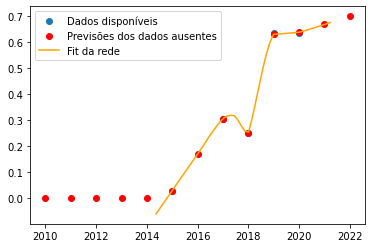

In [13]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*prop_std + prop_mean
prev_ausentes = model.predict(anos_para_prever_norm)*prop_std + prop_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0
    if prev_ausentes[i]>=1:
        prev_ausentes[i]=1

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,prop,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*prop_std + prop_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

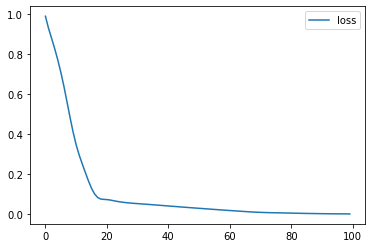

In [14]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [15]:
#Lista de anos sem buracos normalizada e sua predição      (para poder me referir por indices)

anos = np.arange(1950,np.max(anos_para_prever)+1)
anos_norm = (anos-ano_mean)/ano_std
prev_continua = model.predict(anos_norm)*prop_std + prop_mean

for i in range(len(prev_continua)):
    if prev_continua[i]<0:
        prev_continua[i]=0
    if prev_continua[i]>=1:
        prev_continua[i]=1

#Trazendo valores previstos para Camarao_ind
df_prev_Camarao_ind = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Camarao misturado/Previsão Camarao_ind.xlsx')

for i in range(len(df_prev_Camarao_ind['Ano'])):
    if pd.isnull(df.loc[i,'Camarao_ind'])==True:
       df.loc[i,'Camarao_ind'] = df_prev_Camarao_ind.loc[i,'Camarao_ind']
df = df.replace(np.nan,0)

df_preenchido = df[['Ano','Cam_sete_barbas_ind']].replace(np.nan,0)

for i in range(len(prev_continua)):
      df_preenchido.loc[i,'Cam_sete_barbas_ind']=df_preenchido.loc[i,'Cam_sete_barbas_ind']+df.loc[i,'Camarao_ind']*prev_continua[i]
      df_preenchido.loc[i,'Valor acrescido']=df.loc[i,'Camarao_ind']*prev_continua[i]
      

with pd.option_context('display.max_rows', None,):
    print(df_preenchido)



#Planilha com os dados preenchidos
df_preenchido.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_sete_barbas/Previsão Camarao_sete_barbas_ind_2010-2022.xlsx')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
     Ano  Cam_sete_barbas_ind  Valor acrescido
0   1950             0.000000         0.000000
1   1951             0.000000         0.000000
2   1952             0.000000         0.000000
3   1953             0.000000         0.000000
4   1954             0.000000         0.000000
5   1955             0.000000         0.000000
6   1956             0.000000        -0.000000
7   1957             0.000000         0.000000
8   1958             0.000000         0.000000
9   1959             0.000000        -0.000000
10  1960             0.000000         0.000000
11  1961             0.000000         0.000000
12  1962             0.000000         0.000000
13  1963             0.000000         0.000000
14  1964             0.000000         0.000000
15  1965             0.000000         0.000000
16  1966             0.000000         0.000000
17  1967             0.000000         0.000000
18  1968             0.000000         0.000000
19  1969             0

In [17]:
#Planilha com Camarao_ind decrescido do que ja foi usado de 2010 ate 2022
Cam_ind_sem_sb_10_22 = df[['Ano','Camarao_ind']].replace(np.nan,0)
for i in range(len(prev_continua)):
    Cam_ind_sem_sb_10_22.loc[i,'Camarao_ind']-=Cam_ind_sem_sb_10_22.loc[i,'Camarao_ind']*prev_continua[i]


with pd.option_context('display.max_rows', None,):
  print(Cam_ind_sem_sb_10_22)

Cam_ind_sem_sb_10_22.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_sete_barbas/Cam_ind_sem_sb_10-22.xlsx')

     Ano   Camarao_ind
0   1950  0.000000e+00
1   1951  0.000000e+00
2   1952  4.547474e-13
3   1953  0.000000e+00
4   1954  0.000000e+00
5   1955  0.000000e+00
6   1956 -4.547474e-13
7   1957  0.000000e+00
8   1958  4.547474e-13
9   1959 -4.547474e-13
10  1960  0.000000e+00
11  1961  0.000000e+00
12  1962  5.560059e+00
13  1963  2.892493e+01
14  1964  6.291882e+01
15  1965  1.026570e+02
16  1966  1.383086e+02
17  1967  2.637312e+02
18  1968  5.310059e+02
19  1969  3.973083e+02
20  1970  6.940259e+02
21  1971  6.865503e+02
22  1972  9.694937e+02
23  1973  1.752381e+03
24  1974  4.840602e+02
25  1975  1.859133e+03
26  1976  8.241055e+02
27  1977  2.248592e+03
28  1978  2.340000e+02
29  1979  1.909800e+04
30  1980  4.870000e+02
31  1981  4.640000e+02
32  1982  2.210000e+02
33  1983  9.000000e+01
34  1984  9.500000e+01
35  1985  1.004000e+03
36  1986  1.010000e+02
37  1987  4.400000e+01
38  1988  5.500000e+01
39  1989  1.910000e+02
40  1990  0.000000e+00
41  1991  0.000000e+00
42  1992  0

In [18]:
#Fazendo uma planilha com Camarao_ind decrescido do que ja foi retirado em todos os anos
Cam_ind_sem_sb_62_09=pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_sete_barbas/Cam_ind_sem_sb_62-09.xlsx')

Cam_ind_sem_sb = df[['Ano','Camarao_ind']].replace(np.nan,0)
for i in range(len(Cam_ind_sem_sb['Ano'])):
    if i+1950 in Cam_ind_sem_sb_62_09['Ano'].values:
        Cam_ind_sem_sb.loc[i,'Camarao_ind'] = Cam_ind_sem_sb_62_09.loc[i,'Camarao_ind'] 
    else:
        Cam_ind_sem_sb.loc[i,'Camarao_ind'] = Cam_ind_sem_sb_10_22.loc[i,'Camarao_ind'] 

with pd.option_context('display.max_rows', None,):
  print(Cam_ind_sem_sb)

Cam_ind_sem_sb.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_sete_barbas/Cam_ind_sem_sb.xlsx')


     Ano   Camarao_ind
0   1950  0.000000e+00
1   1951  0.000000e+00
2   1952  2.053490e-13
3   1953  0.000000e+00
4   1954  0.000000e+00
5   1955  0.000000e+00
6   1956 -2.133141e-13
7   1957  0.000000e+00
8   1958  2.172448e-13
9   1959 -2.191704e-13
10  1960  0.000000e+00
11  1961  0.000000e+00
12  1962  2.751651e+00
13  1963  1.443910e+01
14  1964  3.167889e+01
15  1965  5.211824e+01
16  1966  7.080711e+01
17  1967  1.360954e+02
18  1968  2.760579e+02
19  1969  2.080767e+02
20  1970  3.661364e+02
21  1971  3.647837e+02
22  1972  5.186799e+02
23  1973  9.439537e+02
24  1974  2.624683e+02
25  1975  1.014475e+03
26  1976  4.524137e+02
27  1977  1.240302e+03
28  1978  1.296926e+02
29  1979  1.063468e+04
30  1980  2.722685e+02
31  1981  2.605881e+02
32  1982  1.245953e+02
33  1983  5.088601e+01
34  1984  5.386145e+01
35  1985  5.720713e+02
36  1986  5.839681e+01
37  1987  2.634329e+01
38  1988  3.445409e+01
39  1989  1.262760e+02
40  1990  0.000000e+00
41  1991  0.000000e+00
42  1992  0